In [2]:
import pandas as pd

# List of file paths for the datasets for each year (2012 to 2019)
data_files = {
    2012: 'datasets_spitsuren_wegvakken/INWEVA_2012_spits.xlsx',
    2013: 'datasets_spitsuren_wegvakken/INWEVA_2013_spits.xlsx',
    2014: 'datasets_spitsuren_wegvakken/INWEVA_2014_spits.xlsx',
    2015: 'datasets_spitsuren_wegvakken/INWEVA_2015_spits.xlsx',
    2016: 'datasets_spitsuren_wegvakken/INWEVA_2016_spits.xlsx',
    2017: 'datasets_spitsuren_wegvakken/INWEVA_2017_spits.xlsx',
    2018: 'datasets_spitsuren_wegvakken/INWEVA_2018_spits.xlsx',
    2019: 'datasets_spitsuren_wegvakken/INWEVA_2019_spits.xlsx',
}

# Initialize an empty list to store results
results = []

# Loop through the datasets
for year, file in data_files.items():
    # Load the dataset for the year
    df = pd.read_excel(file)
    
    # Filter the data for road 4 with HR (Hoofdroute)
    df_road_4HR = df[(df['Wegnr_van'] == 4) & (df["Wegnr_naar"] == 4) & (df['Baantype_naar'] == 'HR') & (df['Baantype_van'] == 'HR')]
    
    # Further filter for Hectometer <= 150,000
    df_road_4HR_HM = df_road_4HR[(df_road_4HR['Hm_van'] <= 150000) & (df_road_4HR['Hm_naar'] <= 150000)]
    
    # Separate data for 'R' (right) direction
    df_road_4HR_HM_R = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'R') & (df_road_4HR_HM['Ri_naar'] == 'R')]
    df_road_4HR_HM_L = df_road_4HR_HM[(df_road_4HR_HM['Ri_van'] == 'L') & (df_road_4HR_HM['Ri_naar'] == 'L')]
    
    # Calculate the mean score for OS_AL (morning rush) and AS_AL (afternoon rush)
    mean_score_R_OS_R = df_road_4HR_HM_R['OS_AL'].mean()
    mean_score_R_AS_R = df_road_4HR_HM_R['AS_AL'].mean()

    mean_score_R_OS_L = df_road_4HR_HM_L['OS_AL'].mean()
    mean_score_R_AS_L = df_road_4HR_HM_L['AS_AL'].mean()
    
     # Store the results for the right side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'R',   # Right-hand side
        'Mean Score': mean_score_R_OS_R
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'R',      # Right-hand side
        'Mean Score': mean_score_R_AS_R
    })
    
    # Store the results for the left side
    results.append({
        'Year': year,
        'Rush': 'Morning',  # OS represents morning rush hour
        'Direction': 'L',   # Left-hand side
        'Mean Score': mean_score_R_OS_L
    })
    
    results.append({
        'Year': year,
        'Rush': 'Afternoon',  # AS represents afternoon rush hour
        'Direction': 'L',      # Left-hand side
        'Mean Score': mean_score_R_AS_L
    })

# Convert the results into a DataFrame
df_results = pd.DataFrame(results)

# Export the results to an Excel file
df_results.to_excel('mean_scores_road4_HR_R_2012_2019.xlsx', index=False)

display(df_results)

/opt/anaconda3/envs/TIL6022/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Year,Rush,Direction,Mean Score
0,2012,Morning,R,4865.486111
1,2012,Afternoon,R,6232.222222
2,2012,Morning,L,5928.235294
3,2012,Afternoon,L,4930.235294
4,2013,Morning,R,5558.046154
5,2013,Afternoon,R,7013.169231
6,2013,Morning,L,6880.406780
7,2013,Afternoon,L,5692.966102
8,2014,Morning,R,5520.048387
9,2014,Afternoon,R,7181.580645


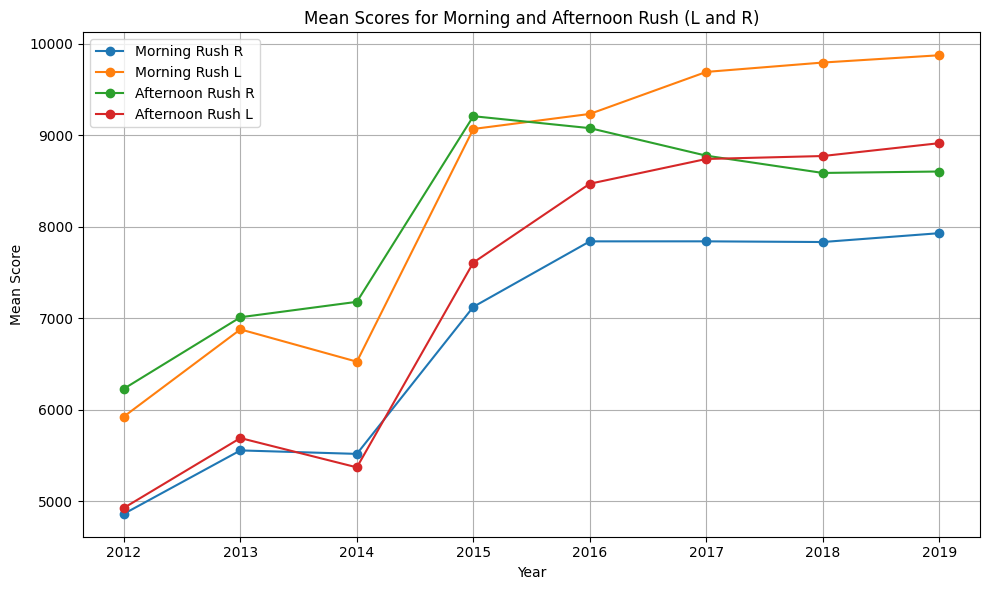

In [3]:
import matplotlib.pyplot as plt

# Load the Excel file
df = pd.read_excel('mean_scores_road4_HR_R_2012_2019.xlsx')

# Pivot the data for easier plotting
# This will create separate columns for each combination of Rush and Direction
pivot_df = df.pivot_table(index='Year', columns=['Rush', 'Direction'], values='Mean Score')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot the four lines for Morning and Afternoon, L and R directions
plt.plot(pivot_df.index, pivot_df[('Morning', 'R')], label='Morning Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Morning', 'L')], label='Morning Rush L', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'R')], label='Afternoon Rush R', marker='o')
plt.plot(pivot_df.index, pivot_df[('Afternoon', 'L')], label='Afternoon Rush L', marker='o')

# Add titles and labels
plt.title('Mean Scores for Morning and Afternoon Rush (L and R)')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

Expected mean score for 2023 (Morning Rush R): 8006.18
Expected mean score for 2023 (Morning Rush L): 10764.10
Expected mean score for 2023 (Afternoon Rush R): 7877.42
Expected mean score for 2023 (Afternoon Rush L): 9474.87


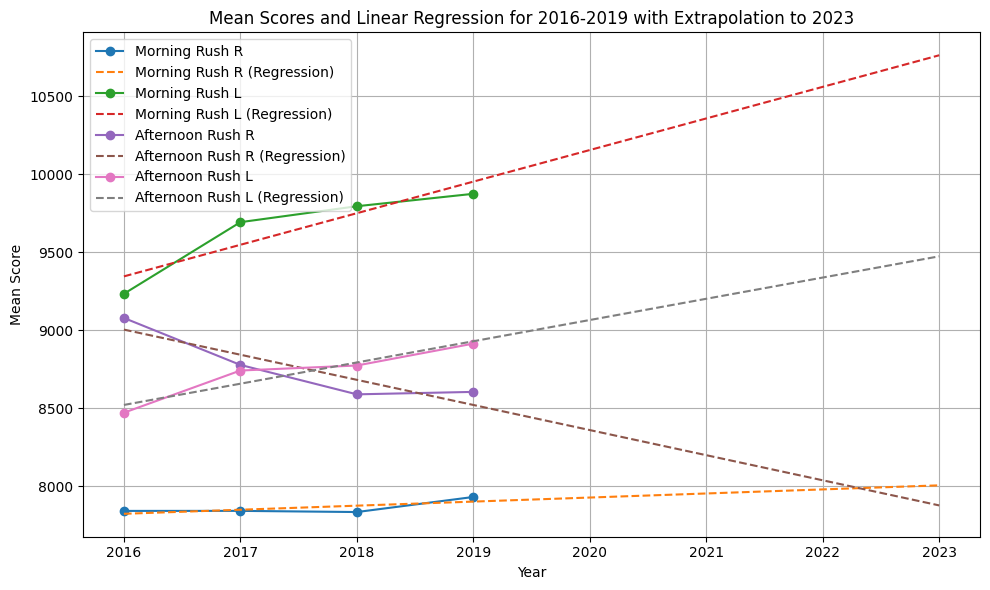

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter the data for the years 2016-2019
df_recent = df_results[(df_results['Year'] >= 2016) & (df_results['Year'] <= 2019)]

# Prepare for linear regression
years = df_recent['Year'].unique().reshape(-1, 1)  # Reshape for sklearn
all_years = np.arange(2016, 2024).reshape(-1, 1)  # Include 2023 for extrapolation

# Create a new figure for the graph
plt.figure(figsize=(10, 6))

# Loop through each Rush and Direction combination to plot and perform regression
for rush in ['Morning', 'Afternoon']:
    for direction in ['R', 'L']:
        # Filter the data for each combination of rush hour and direction
        df_filtered = df_recent[(df_recent['Rush'] == rush) & (df_recent['Direction'] == direction)]
        
        # Extract the mean scores and reshape
        mean_scores = df_filtered['Mean Score'].values
        
        # Perform linear regression based on 2016-2019 data
        reg = LinearRegression().fit(years, mean_scores)
        
        # Predict mean scores up to 2023 based on the regression model
        predicted_scores = reg.predict(all_years)
        
        # Plot actual data points (2016-2019)
        plt.plot(df_filtered['Year'], mean_scores, label=f'{rush} Rush {direction}', marker='o')
        
        # Plot the linear regression line from 2016 to 2023
        plt.plot(all_years, predicted_scores, linestyle='--', label=f'{rush} Rush {direction} (Regression)')
        
        # Print the expected mean score for 2023
        print(f'Expected mean score for 2023 ({rush} Rush {direction}): {predicted_scores[-1]:.2f}')

# Add titles and labels
plt.title('Mean Scores and Linear Regression for 2016-2019 with Extrapolation to 2023')
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



